In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
# import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Of more than 30,000,000 rows.  
num_rows = 10000

# Load the dataset
train_data = pd.read_csv("competitions/expedia-hotel-recommendations/train.csv", nrows=num_rows)
test_data = pd.read_csv("competitions/expedia-hotel-recommendations/test.csv", nrows=num_rows)
ss_data = pd.read_csv("competitions/expedia-hotel-recommendations/sample_submission.csv", nrows=num_rows)
dest_data = pd.read_csv("competitions/expedia-hotel-recommendations/destinations.csv", nrows=num_rows)

print('Total number of records: ', len(train_data))
display(train_data.head(30))
display(test_data.head(10))
# display(ss_data.head(10))
# display(dest_data.head(10))

Total number of records:  10000


,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21
5,2014-08-09 18:13:12,2,3,66,442,35390,911.5142,93,0,0,...,0,1,14984,1,0,1,2,50,1457,92
6,2014-07-16 09:42:23,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,2,2,50,675,41
7,2014-07-16 09:45:48,2,3,66,189,10067,NaN,501,0,1,...,0,1,8267,1,0,1,2,50,675,41
8,2014-07-16 09:52:11,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,69
9,2014-07-16 09:55:24,2,3,66,189,10067,NaN,501,0,0,...,0,1,8267,1,0,1,2,50,675,70


,id,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,hotel_continent,hotel_country,hotel_market
0,0,2015-09-03 17:09:54,2,3,66,174,37449,5539.0567,1,1,...,2016-05-19,2016-05-23,2,0,1,12243,6,6,204,27
1,1,2015-09-24 17:38:35,2,3,66,174,37449,5873.2923,1,1,...,2016-05-12,2016-05-15,2,0,1,14474,7,6,204,1540
2,2,2015-06-07 15:53:02,2,3,66,142,17440,3975.9776,20,0,...,2015-07-26,2015-07-27,4,0,1,11353,1,2,50,699
3,3,2015-09-14 14:49:10,2,3,66,258,34156,1508.5975,28,0,...,2015-09-14,2015-09-16,2,0,1,8250,1,2,50,628
4,4,2015-07-17 09:32:04,2,3,66,467,36345,66.7913,50,0,...,2015-07-22,2015-07-23,2,0,1,11812,1,2,50,538
5,5,2015-07-21 11:58:45,2,3,66,311,48189,359.8521,51,0,...,2015-07-22,2015-07-24,4,0,2,11827,1,2,50,447
6,6,2015-07-29 07:58:39,2,3,66,311,48189,237.3465,51,0,...,2015-08-02,2015-08-03,2,0,1,8271,1,2,50,696
7,7,2015-08-01 20:13:15,2,3,66,348,24811,216.5785,51,0,...,2015-08-03,2015-08-04,2,0,1,8291,1,2,50,191
8,8,2015-11-07 12:29:09,2,3,66,311,48189,2337.6754,51,0,...,2015-12-30,2015-12-31,2,0,1,8250,1,2,50,628
9,9,2015-11-08 16:21:37,2,3,66,311,48189,2539.7995,51,0,...,2016-01-02,2016-01-03,2,0,1,9145,1,2,50,364


In [2]:
# train_data = train_data[:1000]
train_data = train_data[:10000]  # This had caused an error. The date data might include strings and Timestamps... 

In [3]:
# res = train_data.groupby('user_id')['hotel_cluster'].value_counts()
# display(res.head(20))

In [4]:
grouped = train_data.groupby('hotel_cluster')
grouped.size().head(10)

hotel_cluster
0     98
1    112
2     78
3     51
4     77
5    120
6    118
7     86
8    137
9     94
dtype: int64

In [5]:
# See top 10. 
train_data['hotel_cluster'].value_counts().head(10)

91    257
41    237
65    227
48    204
25    188
33    181
95    163
18    160
21    156
70    154
Name: hotel_cluster, dtype: int64

In [6]:
import matplotlib.pyplot as plt

def distribution(data, features, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = plt.figure(figsize = (11, 15));

    # Skewed feature plotting
    for i, feature in enumerate(features):
#         ax = fig.add_subplot(1, 2, i+1)
        ax = fig.add_subplot(3, 2, i+1)
        ax.hist(data[feature].dropna(), bins = 100, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
#         ax.set_ylim((0, 2000))
#         ax.set_yticks([0, 500, 1000, 1500, 2000])
#         ax.set_yticklabels([0, 500, 1000, 1500, ">2000"])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

In [7]:
# Target data. 
hotel_cluster_raw = train_data['hotel_cluster']

In [8]:
# Create training data. 
# Create a new column, 'length_stay', which is equal to 'srch_co' - 'srch_ci'.
from datetime import datetime
# train_data['srch_ci'].head(5)  # 0    2014-08-27, ... 
train_data['srch_ci'] = train_data['srch_ci'].dropna()\
    .apply(lambda x: x if isinstance(x, datetime) else datetime.strptime(x[:10], "%Y-%m-%d"))
train_data['srch_co'] = train_data['srch_co'].dropna()\
    .apply(lambda x: x if isinstance(x, datetime) else datetime.strptime(x[:10], "%Y-%m-%d"))
train_data['length_stay'] = (train_data['srch_co'] - train_data['srch_ci']).dropna().apply(lambda x: x.days)
train_data['length_stay'].head(20)

0     4.0
1     4.0
2     4.0
3     5.0
4     5.0
5     5.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    3.0
13    3.0
14    3.0
15    2.0
16    2.0
17    2.0
18    2.0
19    2.0
Name: length_stay, dtype: float64

In [9]:
# Drop columns. 
drop_columns = ['date_time', 'user_id', 'hotel_cluster', 'srch_ci', 'srch_co']
features_raw = train_data.drop(drop_columns, axis=1)

/Users/kei/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


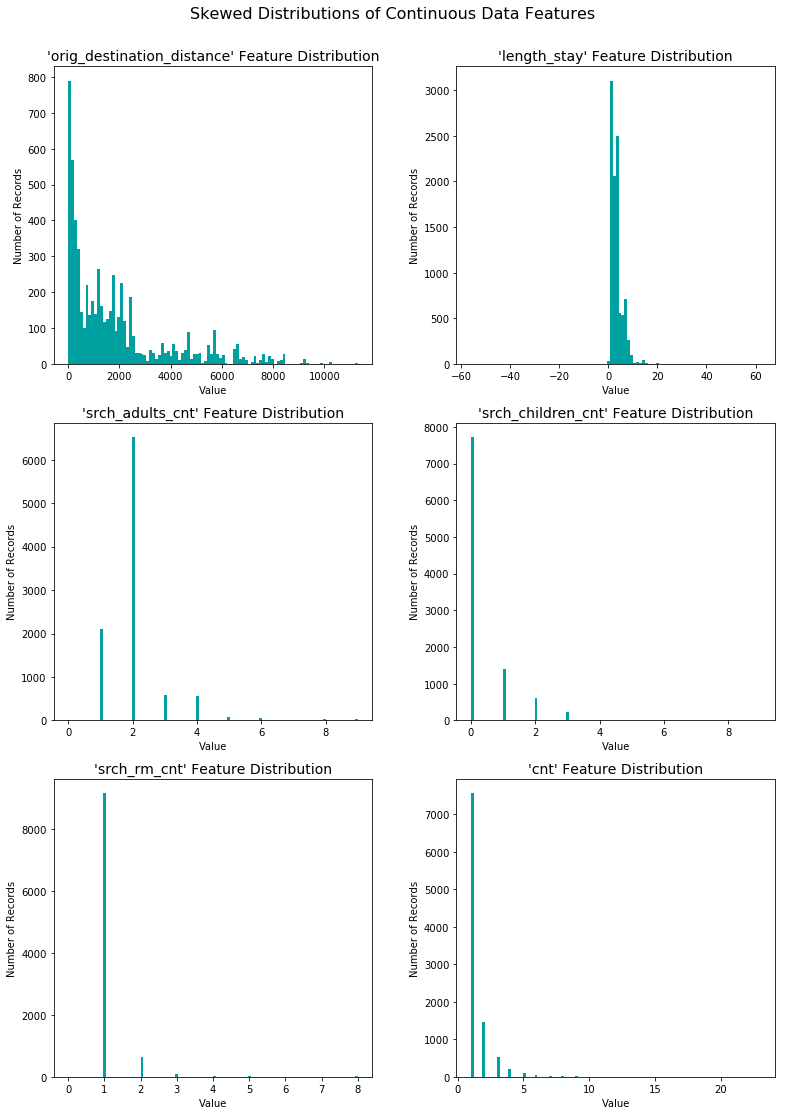

In [10]:
# Display the distribution of 'orig_destination_distance'. 
numerical_data = ['orig_destination_distance', 'length_stay', 'srch_adults_cnt', 'srch_children_cnt', \
                   'srch_rm_cnt', 'cnt']
distribution(train_data, numerical_data)

/Users/kei/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/Users/kei/anaconda/lib/python3.5/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


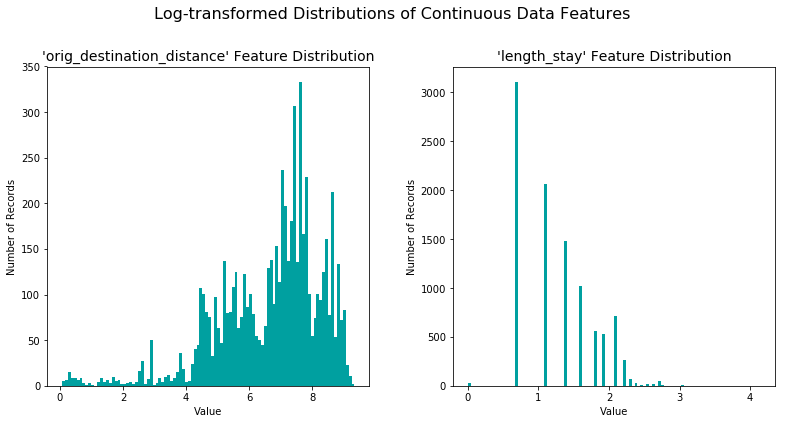

In [11]:
# Log-transform the skewed features
skewed = ['orig_destination_distance', 'length_stay']
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, skewed, transformed=True)

In [12]:
# Normalization. 
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

print(len(features_log_transformed))  # 10000
print(len(features_log_transformed.dropna()))  # 6263
print(len(features_log_transformed['orig_destination_distance'].dropna()))  # 6271
print(len(features_log_transformed['length_stay'].dropna()))  # 9991
print(len(features_log_transformed))  # 10000

# Delete rows that include NaN.
features_log_transformed_nandropped = features_log_transformed.dropna()
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed_nandropped)


features_log_minmax_transform[numerical_data] = \
    scaler.fit_transform(features_log_transformed_nandropped[numerical_data])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(10))

10000
6263
6271
9991
10000


,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,length_stay
0,2,3,66,348,48862,0.825163,0,1,9,0.222222,0.0,0.125,8250,1,0,0.1,2,50,628,0.456402
1,2,3,66,348,48862,0.825163,0,1,9,0.222222,0.0,0.125,8250,1,1,0.0,2,50,628,0.456402
2,2,3,66,348,48862,0.825163,0,0,9,0.222222,0.0,0.125,8250,1,0,0.0,2,50,628,0.456402
3,2,3,66,442,35390,0.728712,0,0,3,0.222222,0.0,0.125,14984,1,0,0.0,2,50,1457,0.508104
4,2,3,66,442,35390,0.728763,0,0,3,0.222222,0.0,0.125,14984,1,0,0.0,2,50,1457,0.508104
5,2,3,66,442,35390,0.728514,0,0,3,0.222222,0.0,0.125,14984,1,0,0.0,2,50,1457,0.508104
12,2,3,66,318,22418,0.645233,0,1,9,0.222222,0.0,0.125,8291,1,0,0.2,2,50,191,0.393123
14,2,3,66,318,22418,0.645537,0,1,2,0.222222,0.0,0.125,8291,1,0,0.0,2,50,191,0.393123
15,2,3,66,318,22418,0.645537,0,1,2,0.222222,0.0,0.125,8291,1,0,0.0,2,50,191,0.311543
16,2,3,66,318,22418,0.645537,0,1,2,0.222222,0.0,0.125,8291,1,0,0.0,2,50,191,0.311543


In [13]:
# One-hot encoding. 

# print("site_name: ")
# features_log_minmax_transform['site_name'].value_counts()

# print("posa_continent: ")
# features_log_minmax_transform['posa_continent'].value_counts()

# print("user_location_country: ")
# features_log_minmax_transform['user_location_country'].value_counts()

# print("user_location_region: ")
# features_log_minmax_transform['user_location_region'].value_counts()

# print("user_location_city: ")
# features_log_minmax_transform['user_location_city'].value_counts()
# len(features_log_minmax_transform['user_location_city'].value_counts())

# print("channel: ")
# features_log_minmax_transform['channel'].value_counts()

# print("srch_destination_id: ")
# features_log_minmax_transform['srch_destination_id'].value_counts()

print("srch_destination_type_id: ")
features_log_minmax_transform['srch_destination_type_id'].value_counts()

# print("hotel_continent: ")
# features_log_minmax_transform['hotel_continent'].value_counts()

# print("hotel_country: ")
# features_log_minmax_transform['hotel_country'].value_counts()

# print("hotel_market: ")
# features_log_minmax_transform['hotel_market'].value_counts()

srch_destination_type_id: 


1    3809
6    1518
3     419
5     298
4     206
8      13
Name: srch_destination_type_id, dtype: int64

In [14]:
categorical_columns = ['site_name', 'posa_continent', 'user_location_country', 'user_location_region', \
                       'user_location_city', 'channel', 'srch_destination_id', 'hotel_continent', \
                       'srch_destination_type_id', 'hotel_country', 'hotel_market']

In [18]:
# Convert type 'int' to 'string' in the categorical columns. 
features_log_minmax_transform[categorical_columns] = \
    features_log_minmax_transform[categorical_columns].astype('str')

# One-hot encoding. 
features_final = pd.get_dummies(features_log_minmax_transform)
# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
print()
# See the encoded feature names.
print(encoded)

1884 total features after one-hot encoding.

['orig_destination_distance', 'is_mobile', 'is_package', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'is_booking', 'cnt', 'length_stay', 'site_name_10', 'site_name_11', 'site_name_13', 'site_name_2', 'site_name_23', 'site_name_24', 'site_name_25', 'site_name_34', 'site_name_8', 'posa_continent_0', 'posa_continent_1', 'posa_continent_2', 'posa_continent_3', 'posa_continent_4', 'user_location_country_1', 'user_location_country_182', 'user_location_country_205', 'user_location_country_215', 'user_location_country_46', 'user_location_country_66', 'user_location_country_77', 'user_location_region_135', 'user_location_region_143', 'user_location_region_149', 'user_location_region_153', 'user_location_region_155', 'user_location_region_158', 'user_location_region_171', 'user_location_region_172', 'user_location_region_173', 'user_location_region_174', 'user_location_region_184', 'user_location_region_189', 'user_location_region_196', 'us